In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/bank-full.csv', delimiter=';')



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
                0           1             2            3        4      \
age                58          44     

In [4]:

# Display the first few rows of the dataframe
print(df.head())





   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [5]:
# Transpose the dataframe to arrange data in column format
df_transposed = df.T


In [6]:
# Display the transposed dataframe
print(df_transposed)

                0           1             2            3        4      \
age                58          44            33           47       33   
job        management  technician  entrepreneur  blue-collar  unknown   
marital       married      single       married      married   single   
education    tertiary   secondary     secondary      unknown  unknown   
default            no          no            no           no       no   
balance          2143          29             2         1506        1   
housing           yes         yes           yes          yes       no   
loan               no          no           yes           no       no   
contact       unknown     unknown       unknown      unknown  unknown   
day                 5           5             5            5        5   
month             may         may           may          may      may   
duration          261         151            76           92      198   
campaign            1           1             1    

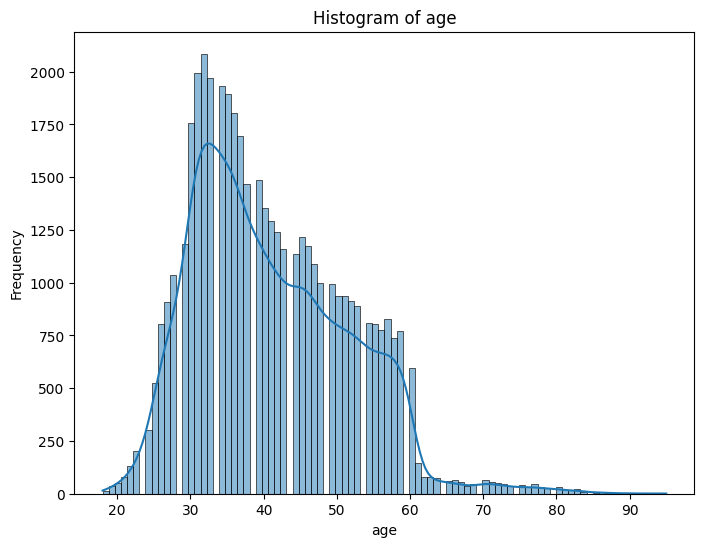

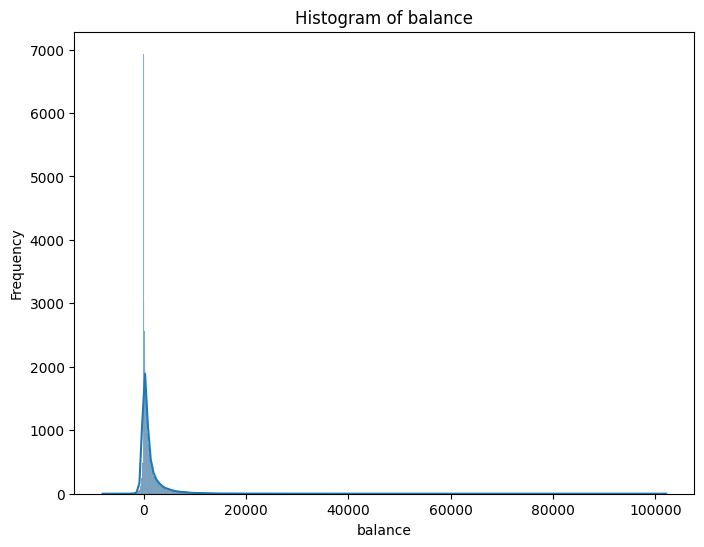

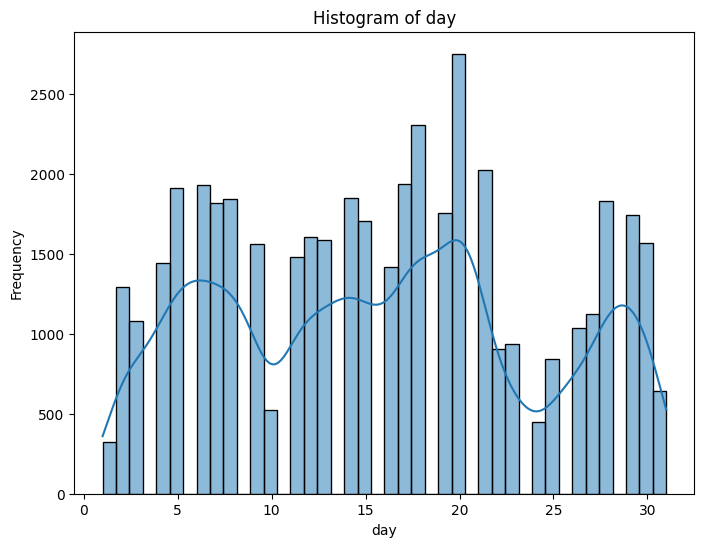

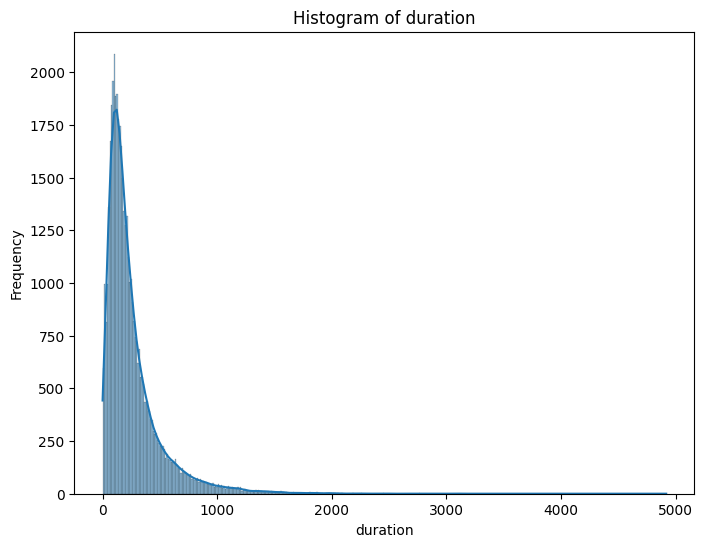

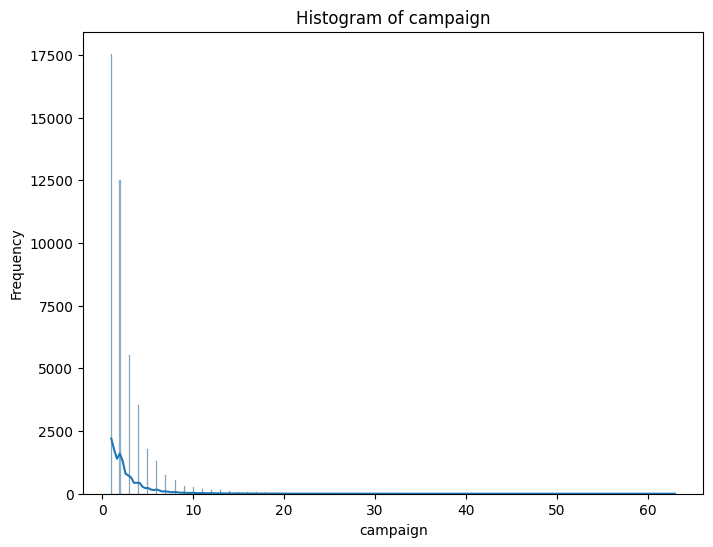

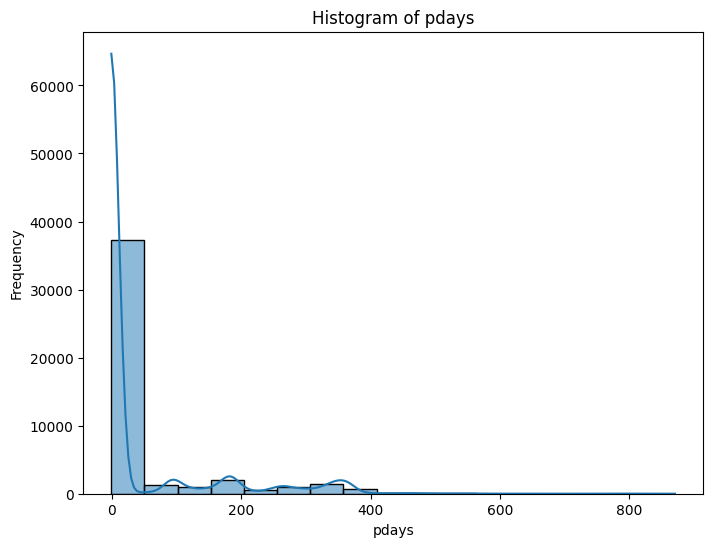

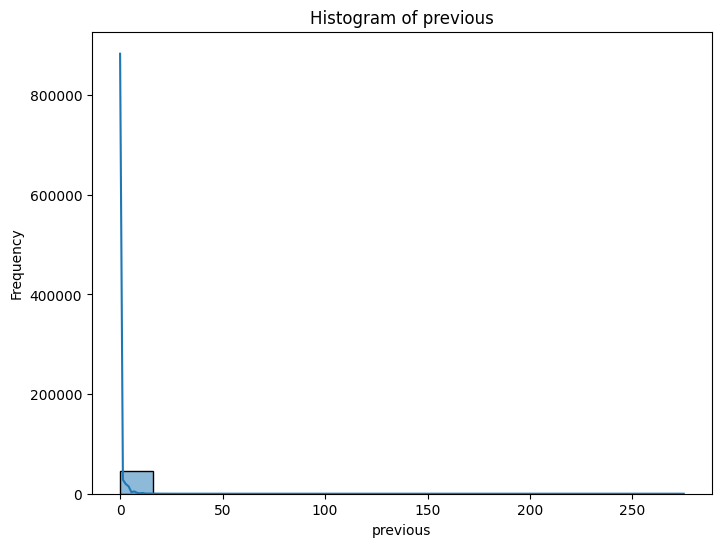

In [7]:
# Univariate Analysis

# Histogram for numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 1000x800 with 0 Axes>

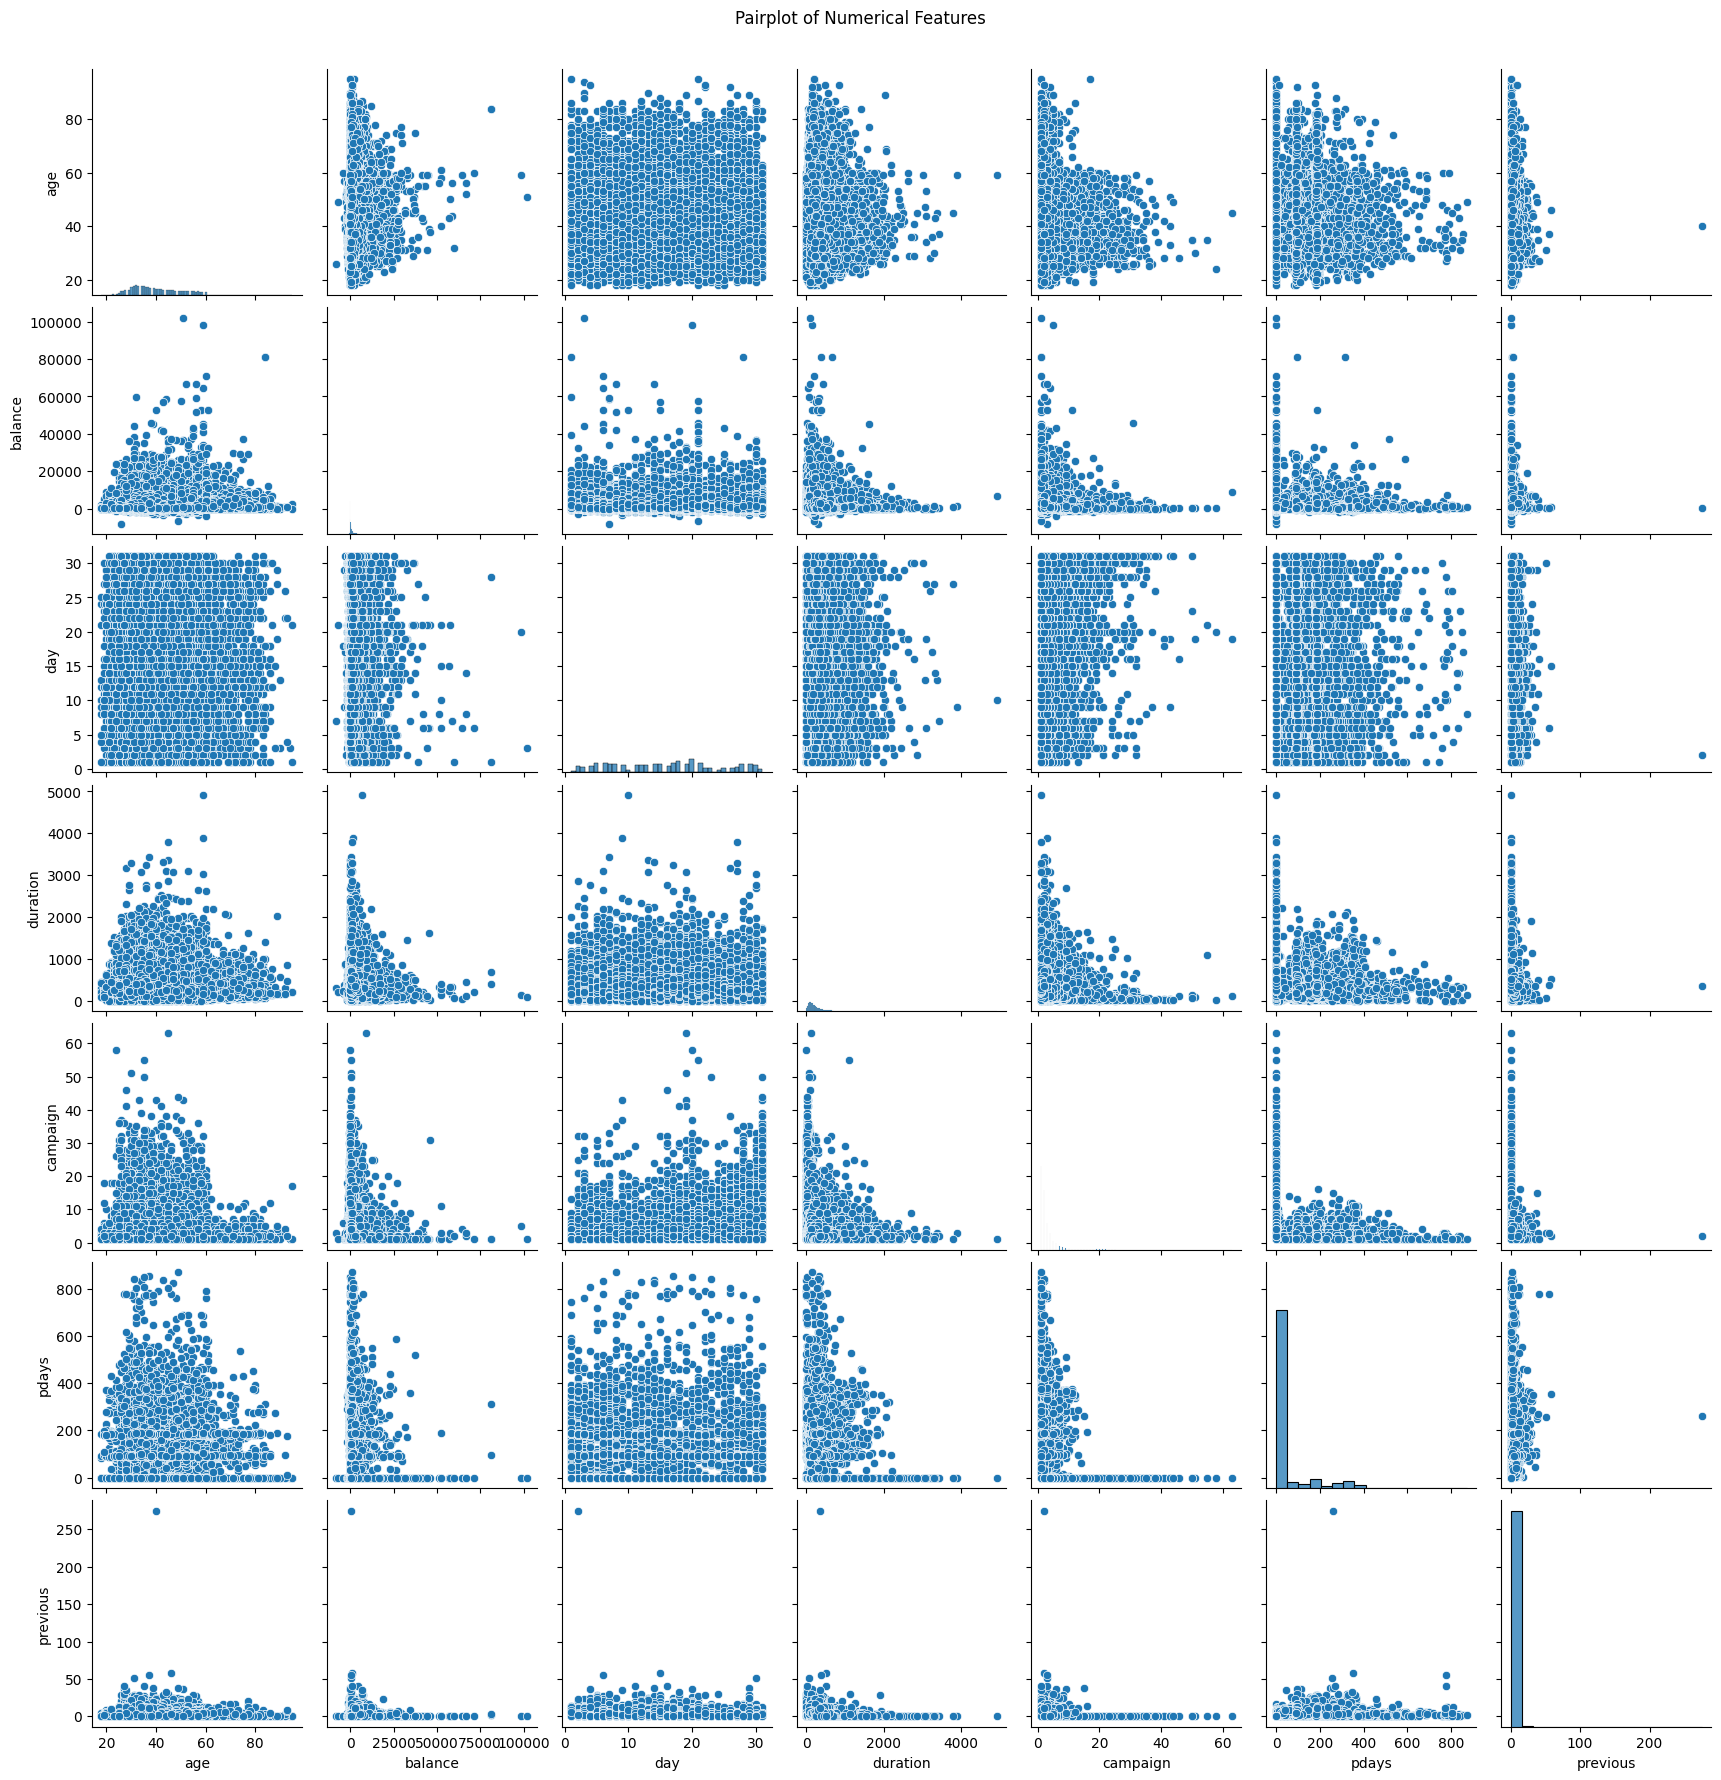

In [8]:
# Bivariate Analysis

# Pairplot for numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

<ipython-input-9-ff45c45da018>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


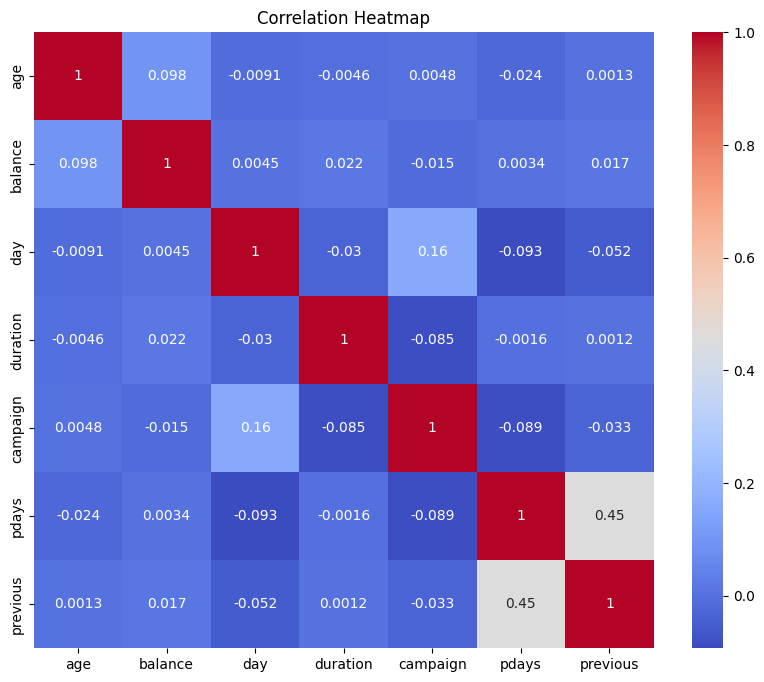

In [9]:
# Multivariate Analysis

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Create a new dataframe to organize data into a table
table_df = pd.DataFrame(columns=['Column Name', 'Values'])

In [ ]:
# Extract column names and values
column_names = df_transposed.index.tolist()
values = df_transposed.values.tolist()

In [ ]:
# Populate the dataframe with column names and values
table_df['Column Name'] = column_names
table_df['Values'] = values

In [ ]:
# Display the table
print(table_df)

   Column Name                                             Values
0          age  [58, 44, 33, 47, 33, 35, 28, 42, 58, 43, 41, 2...
1          job  [management, technician, entrepreneur, blue-co...
2      marital  [married, single, married, married, single, ma...
3    education  [tertiary, secondary, secondary, unknown, unkn...
4      default  [no, no, no, no, no, no, no, yes, no, no, no, ...
5      balance  [2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, ...
6      housing  [yes, yes, yes, yes, no, yes, yes, yes, yes, y...
7         loan  [no, no, yes, no, no, no, yes, no, no, no, no,...
8      contact  [unknown, unknown, unknown, unknown, unknown, ...
9          day  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...
10       month  [may, may, may, may, may, may, may, may, may, ...
11    duration  [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...
12    campaign  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
13       pdays  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
14    prev

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['y_yes'])
y = df_encoded['y_yes']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Train Accuracy: 0.8920592789205928
Test Accuracy: 0.8886431493973239
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.61      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.86      9043

ROC-AUC Score: 0.6001819809784463


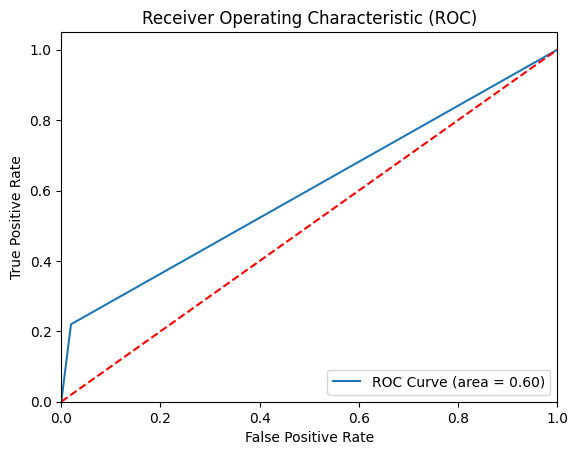

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Accuracy score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Train Accuracy:', accuracy_train)
print('Test Accuracy:', accuracy_test)

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_test))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_test)
print('ROC-AUC Score:', roc_auc)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


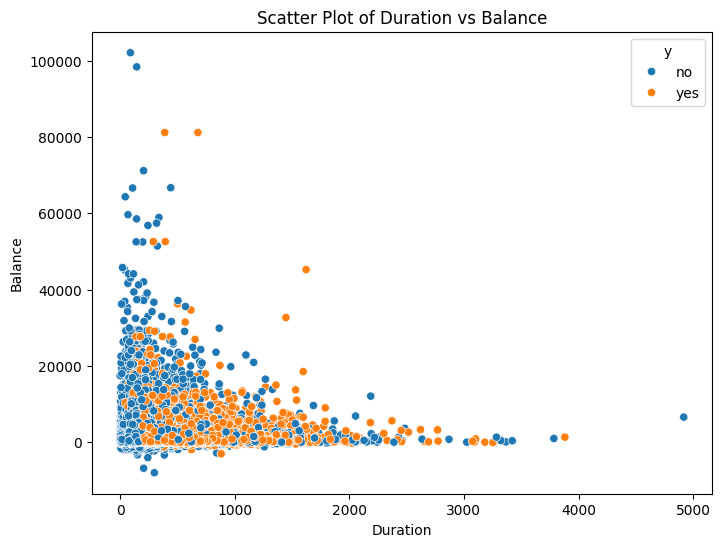

In [10]:
# Additional Visualizations

# Scatter plot for two most important features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='balance', hue='y', data=df)
plt.title('Scatter Plot of Duration vs Balance')
plt.xlabel('Duration')
plt.ylabel('Balance')
plt.show()


<Figure size 1000x800 with 0 Axes>

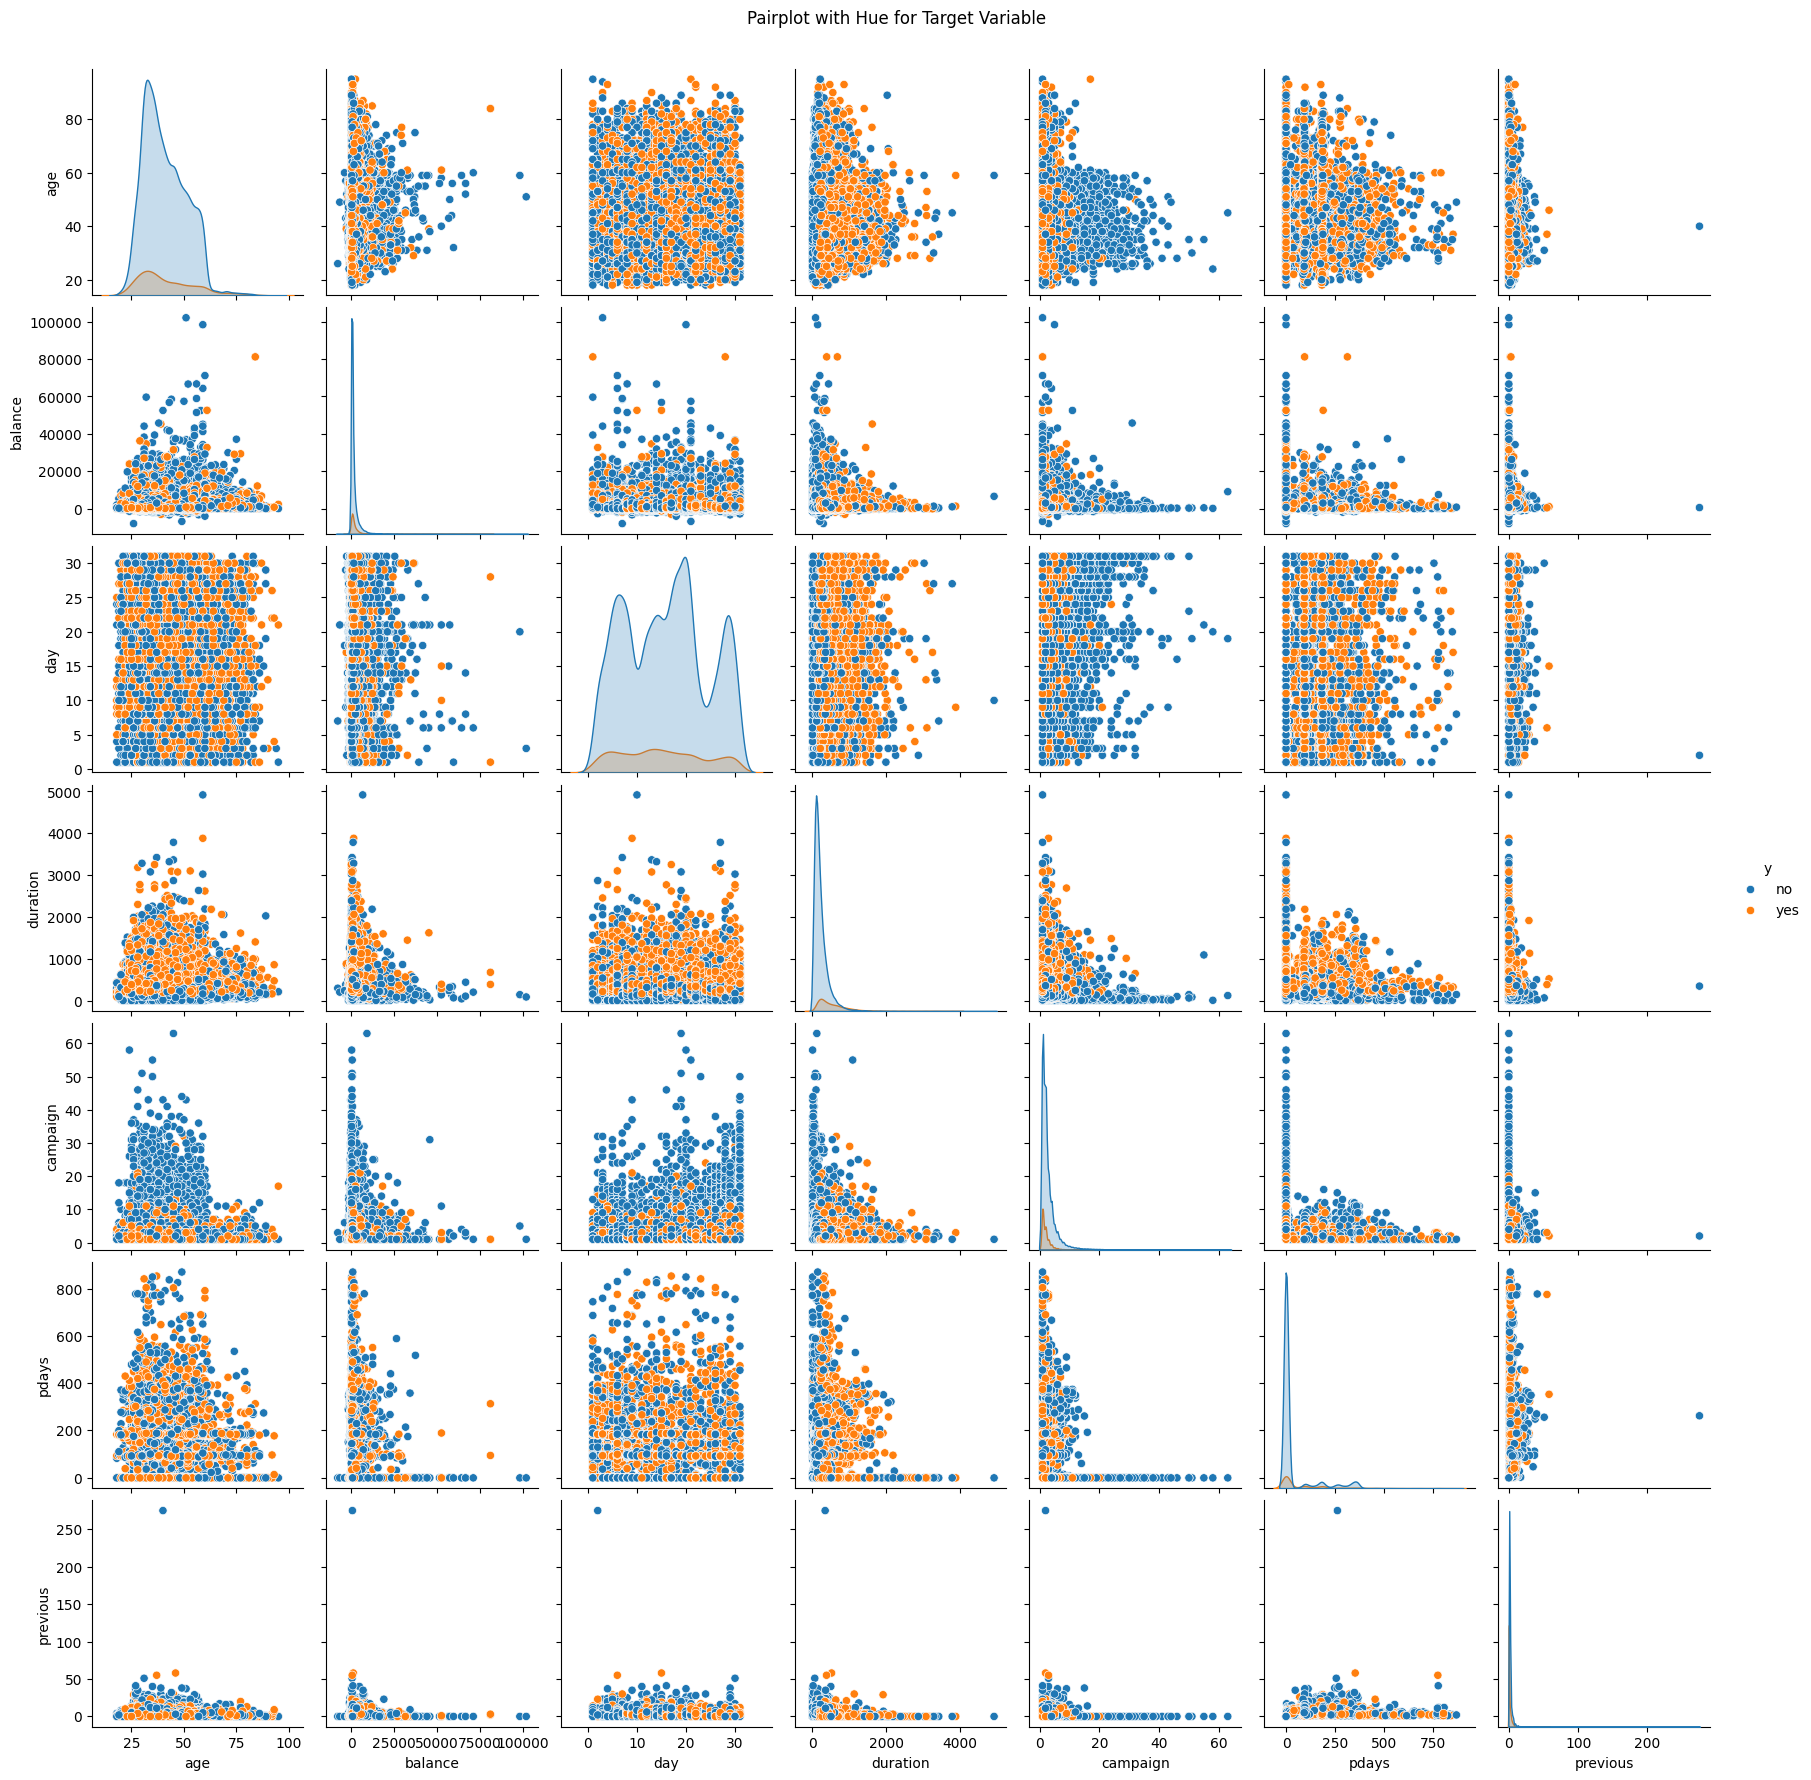

In [11]:
# Pairplot with hue for target variable
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='y')
plt.suptitle('Pairplot with Hue for Target Variable', y=1.02)
plt.show()